In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns;

sns.set(font_scale=1)
%load_ext autoreload
%autoreload 2

# Part A: 1

In [2]:
data = pd.read_csv("AdmissionPredict.csv")
data.head()
# data.tail()
# data.info
# data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


# Part A: 2

In [3]:
print(data.isna().sum())
# print(data.notna().sum())

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64


# Part A: 3

In [4]:
datause = data.copy()
for i in datause:
    if i != "Chance of Admit":
        datause[i].fillna(np.mean(datause[i]), inplace=True)

In [5]:
datause.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.000000,118.000000,4,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.000000,4,4.0,4.5,8.87,1,NaN
2,3,316.000000,107.386842,3,3.0,3.5,8.00,1,0.72
3,4,316.759259,110.000000,3,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.000000,2,2.0,3.0,8.21,0,0.65


# Part B: 1

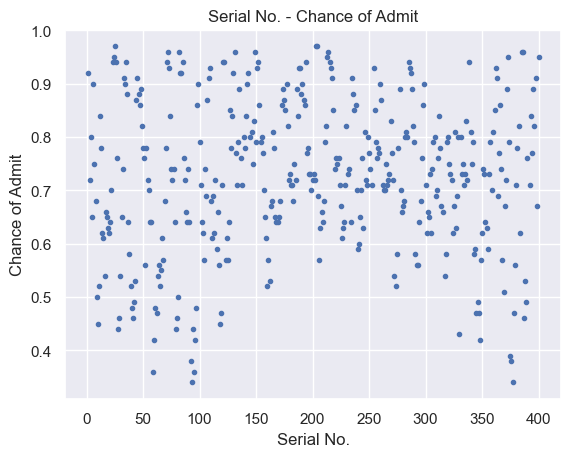

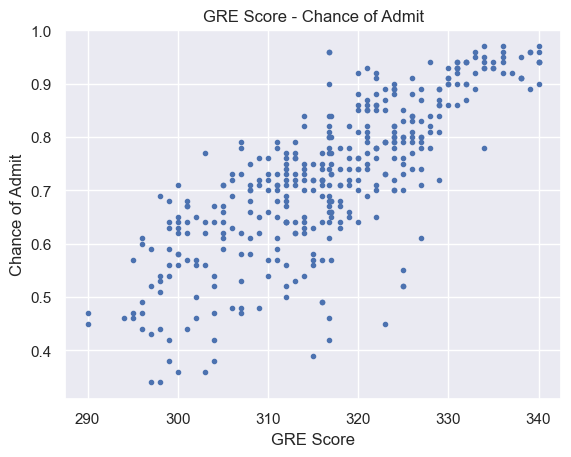

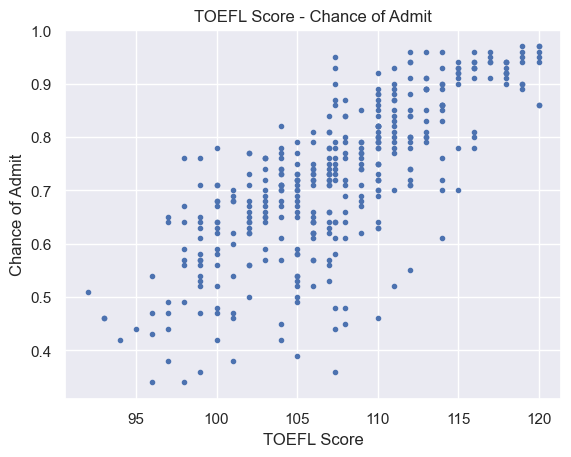

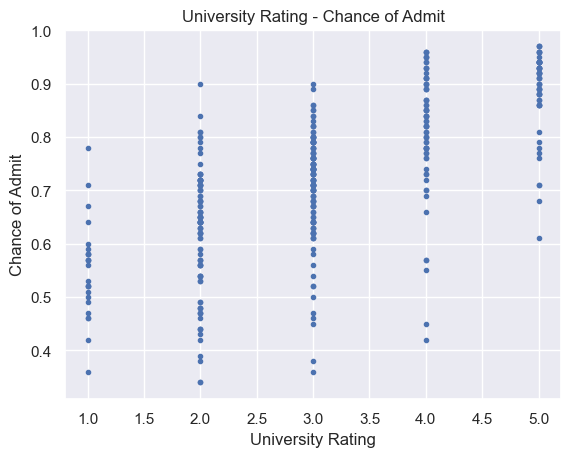

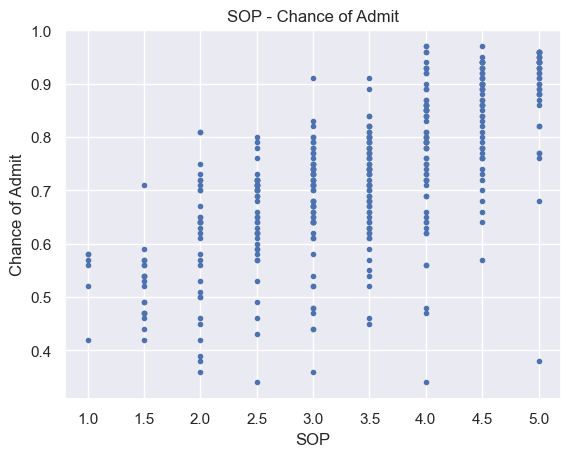

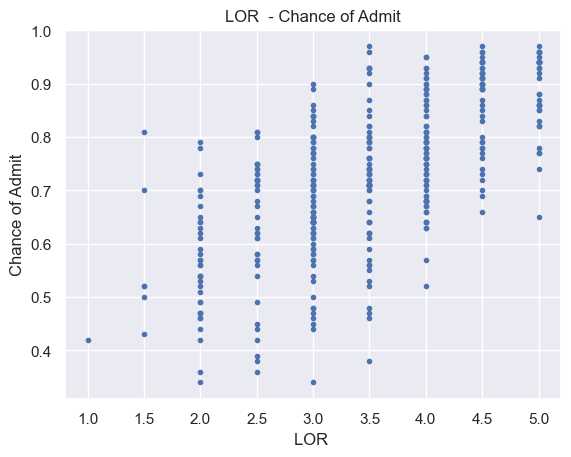

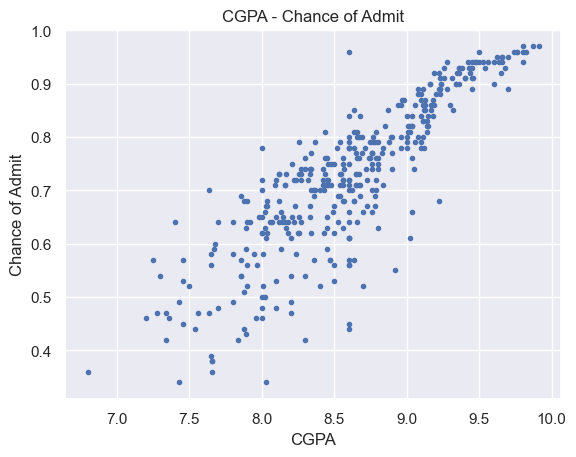

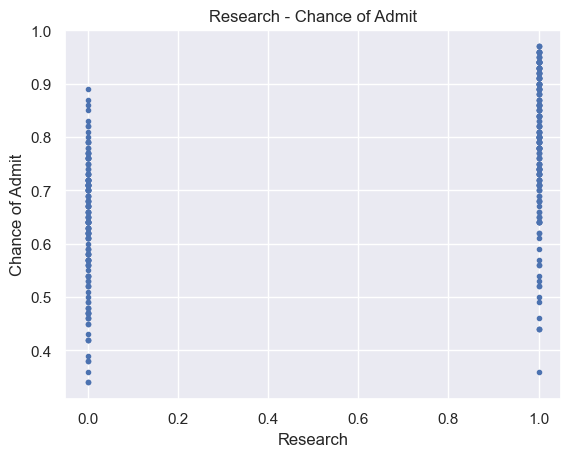

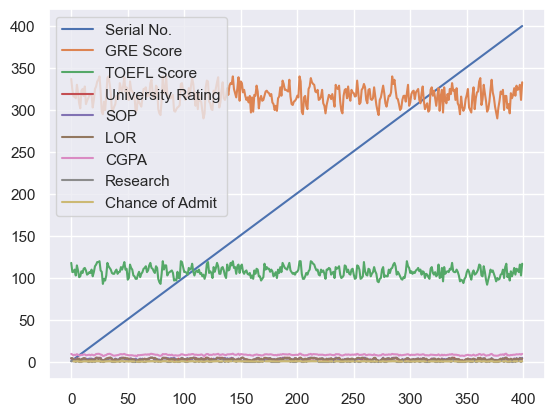

In [6]:
not_compare_data = ["Chance of Admit"]
for i in datause:
    if i not in not_compare_data:
        plt.clf()
        plt.scatter(datause[i], datause["Chance of Admit"], marker=".")
        # plt.savefig(f"curve {i} - Chance of Admit.png")
        plt.xlabel(f"{i}")
        plt.ylabel(f"Chance of Admit")
        plt.title(f"{i} - Chance of Admit")
        plt.show()
datause.plot()
plt.show()

# Part C: 1

In [7]:
temp = (datause[["CGPA", "TOEFL Score"]] >= [9, 110]).sum(axis=1)
print(f"{(temp == 2).sum()} number of them will pass the requirements.")

97 number of them will pass the requirements.


# Part C: 2

In [8]:
temp = (datause[["University Rating", "GRE Score"]])
uni1 = datause[datause["University Rating"] == 1]
print(f"{np.mean(uni1['GRE Score']):.2f} is the mean for rank 1")

uni2 = datause[datause["University Rating"] == 2]
print(f"{np.mean(uni2['GRE Score']):.2f} is the mean for rank 2")

uni3 = datause[datause["University Rating"] == 3]
print(f"{np.mean(uni3['GRE Score']):.2f} is the mean for rank 3")

uni4 = datause[datause["University Rating"] == 4]
print(f"{np.mean(uni4['GRE Score']):.2f} is the mean for rank 4")

uni5 = datause[datause["University Rating"] == 5]
print(f"{np.mean(uni5['GRE Score']):.2f} is the mean for rank 5")


303.15 is the mean for rank 1
309.75 is the mean for rank 2
315.93 is the mean for rank 3
324.08 is the mean for rank 4
327.95 is the mean for rank 5


In [9]:
print(type(uni3))

<class 'pandas.core.frame.DataFrame'>


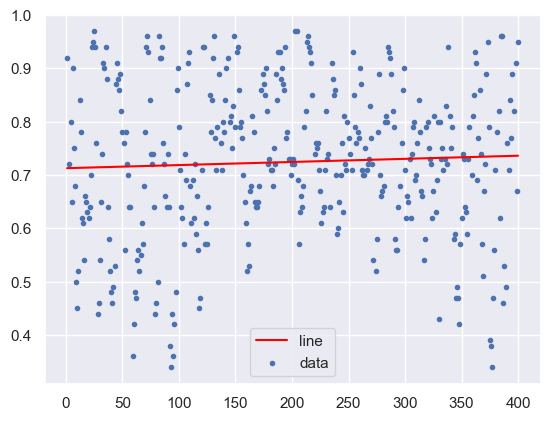

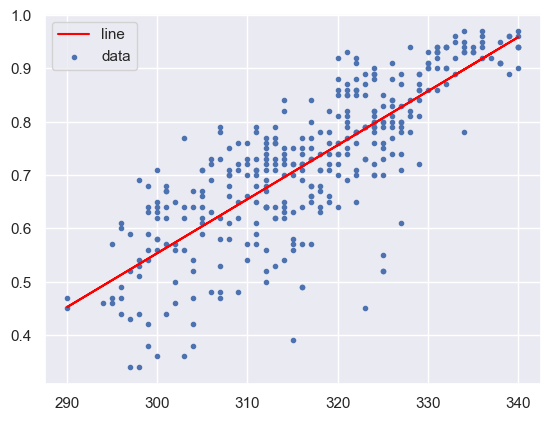

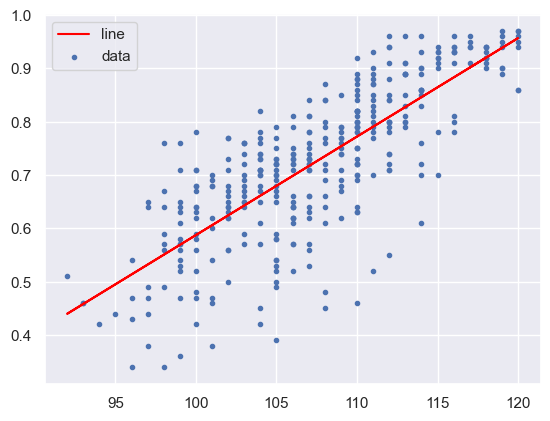

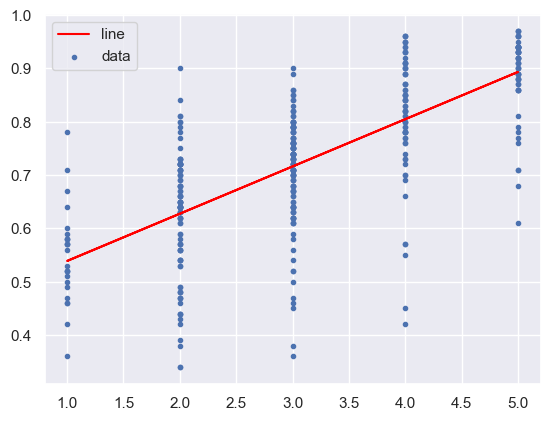

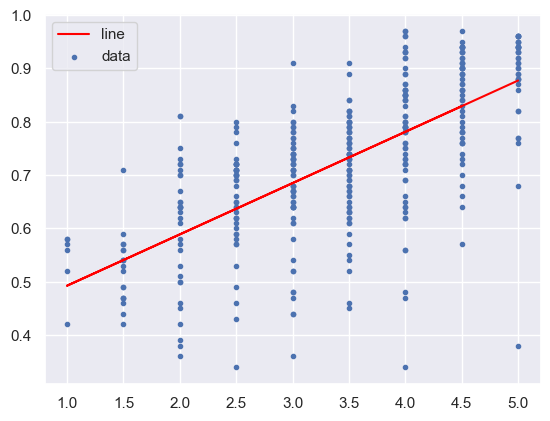

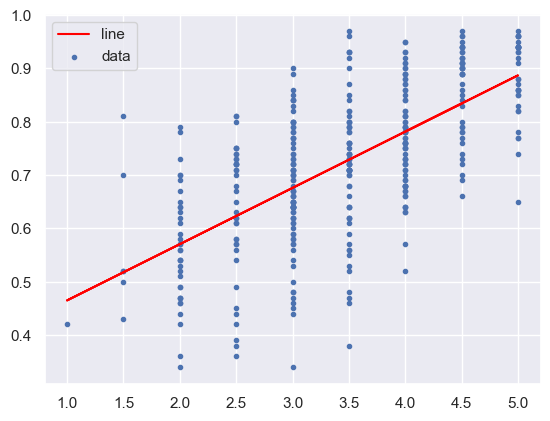

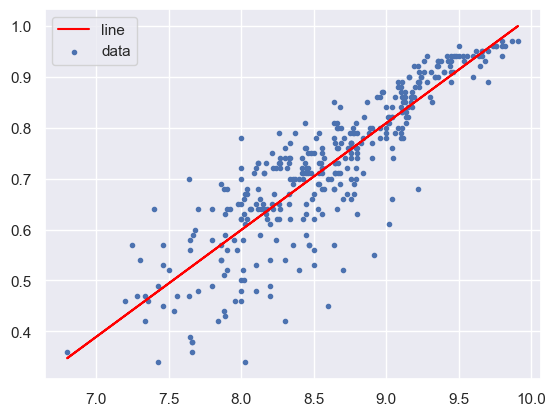

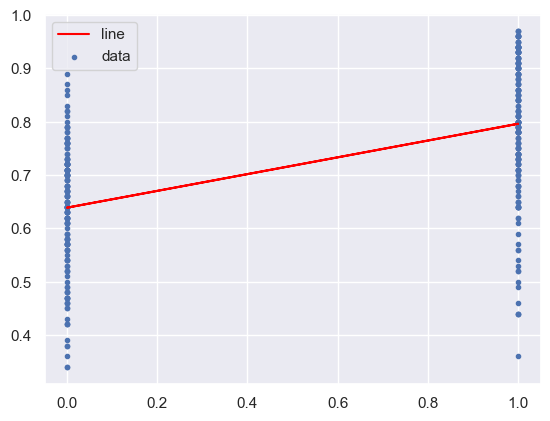

[0.20965567302027488, -1.0783182529861652]


In [10]:
import Toolkit_01 as tl

# print(data.head())
serial = data[["Serial No.", "Chance of Admit"]]
GRE = data[["GRE Score", "Chance of Admit"]]
TOEFL = data[["TOEFL Score", "Chance of Admit"]]
University = data[["University Rating", "Chance of Admit"]]
SOP = data[["SOP", "Chance of Admit"]]
LOR = data[["LOR ", "Chance of Admit"]]
CGPA = data[["CGPA", "Chance of Admit"]]
Research = data[["Research", "Chance of Admit"]]

d1 = tl.Regression(serial)
d2 = tl.Regression(GRE)
d3 = tl.Regression(TOEFL)
d4 = tl.Regression(University)
d5 = tl.Regression(SOP)
d6 = tl.Regression(LOR)
d7 = tl.Regression(CGPA)
d8 = tl.Regression(Research)

# print(d1.cost())
# print(d2.cost())
# print(d3.cost())
# print(d4.cost())
# print(d5.cost())
# print(d6.cost())
# print(d7.cost())
# print(d8.cost())
d1.plot()
d2.plot()
d3.plot()
d4.plot()
d5.plot()
d6.plot()
d7.plot()
d8.plot()
print(d7.find_m_c())

In [11]:
data2 = data.copy().dropna()
X = data2[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]
y = data2["Chance of Admit"]

model_linear_regression = linear_model.LinearRegression()
model_linear_regression.fit(X, y)
print(model_linear_regression.predict([[337, 110, 5, 2, 3, 9, 1]]))
print(model_linear_regression.coef_)

[0.83307505]
[ 0.00178129  0.00264354  0.00737862 -0.00242071  0.01965141  0.12152836
  0.01942173]


D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# by support vector machin
I will separate the chance to [0,0.2], [0.2,0.4], [0.4,0.6], [0.6.,0.8], [0.8,1]

In [12]:
df = data.copy()
df.head(100)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
95,96,304.0,100.0,4,1.5,2.5,7.84,0,0.42
96,97,306.0,100.0,2,3.0,3.0,8.00,0,0.48
97,98,331.0,120.0,3,4.0,4.0,8.96,1,0.86
98,99,332.0,119.0,4,5.0,4.5,9.24,1,0.90


In [17]:
def ch(x):
    if x >= 0.8:
        return 5
    elif x >= 0.6:
        return 4
    elif x >= 0.4:
        return 3
    elif x >= 0.2:
        return 2
    else:
        return 1
df = df.dropna()

df["chance"] = df["Chance of Admit"].apply(lambda x: ch(x))
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92,5
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65,4
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90,5
7,8,308.0,101.0,2,3.0,4.0,7.90,0,0.68,4
8,9,302.0,102.0,1,2.0,1.5,8.00,0,0.50,3
9,10,323.0,108.0,3,3.5,3.0,8.60,0,0.45,3
10,11,325.0,106.0,3,3.5,4.0,8.40,1,0.52,3
12,13,328.0,112.0,4,4.0,4.5,9.10,1,0.78,4
13,14,307.0,109.0,3,4.0,3.0,8.00,1,0.62,4
14,15,311.0,104.0,3,3.5,2.0,8.20,1,0.61,4


In [20]:
df0 = df[df.chance==1]
df1 = df[df.chance==2]
df2 = df[df.chance==3]
df3 = df[df.chance==4]
df4 = df[df.chance==5]

plt.scatter(df0["GRE Score"], df0["TOEFL Score"], color= "yellow", marker="o")
plt.scatter(df1["GRE Score"], df1["TOEFL Score"], color= "green", marker="o")
plt.scatter(df2["GRE Score"], df2["TOEFL Score"], color= "blue", marker="o")
plt.scatter(df3["GRE Score"], df3["TOEFL Score"], color= "red", marker="o")
plt.scatter(df4["GRE Score"], df4["TOEFL Score"], color= "black", marker="o")
plt.show()
df4["GRE Score"]

0      337.0
5      330.0
22     328.0
23     334.0
24     336.0
       ...  
382    324.0
394    329.0
395    324.0
397    330.0
399    333.0
Name: GRE Score, Length: 107, dtype: float64

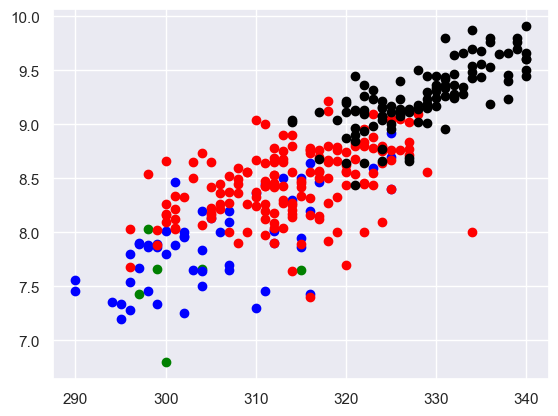

In [15]:
plt.scatter(df0["GRE Score"], df0["CGPA"], color= "yellow", marker="o")
plt.scatter(df1["GRE Score"], df1["CGPA"], color= "green", marker="o")
plt.scatter(df2["GRE Score"], df2["CGPA"], color= "blue", marker="o")
plt.scatter(df3["GRE Score"], df3["CGPA"], color= "red", marker="o")
plt.scatter(df4["GRE Score"], df4["CGPA"], color= "black", marker="o")
plt.show()

In [19]:
target = df.chance
X = df.drop(["Chance of Admit", "chance","Serial No."], axis="columns")
y = target

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel="poly", C=10)
model.fit(X_train, y_train)

print(model.C)
print(model.gamma)
print(model.kernel)

In [53]:
model.score(X_test,y_test)

0.7727272727272727